<a href="https://colab.research.google.com/github/mounikareddy66/fertilizer-recommender/blob/main/Fertilizer_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Interactive UI
!pip install gradio
import gradio as gr

def recommend_fertilizer(Temperature, Humidity, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    # Load model
    loaded = pickle.load(open('model.pkl', 'rb'))
    model, le_soil, le_crop, le_fert = loaded['model'], loaded['le_soil'], loaded['le_crop'], loaded['le_fert']

    # Preprocess inputs
    soil_encoded = le_soil.transform([Soil_Type])[0]
    crop_encoded = le_crop.transform([Crop_Type])[0]

    # Predict
    prediction = model.predict([[Temperature, Humidity, soil_encoded, crop_encoded,
                               Nitrogen, Potassium, Phosphorous]])
    return le_fert.inverse_transform(prediction)[0]

# Create interface
inputs = [
    gr.Number(label="Temperature (°C)"),
    gr.Number(label="Humidity (%)"),
    gr.Dropdown(label="Soil Type", choices=['Loamy', 'Sandy', 'Clay', 'Black', 'Red']),
    gr.Dropdown(label="Crop Type", choices=['Wheat', 'Rice', 'Corn', 'Soybean', 'Cotton']),
    gr.Number(label="Nitrogen (ppm)"),
    gr.Number(label="Potassium (ppm)"),
    gr.Number(label="Phosphorous (ppm)")
]

gr.Interface(fn=recommend_fertilizer, inputs=inputs, outputs="text").launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9434bcf1cc80f1a46f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 

### Model Performance:
- Random Forest Classifier achieved **85% accuracy**
- Handles mixed data types (numeric + categorical) well


In [ ]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

df['Soil_Type'] = le_soil.fit_transform(df['Soil_Type'])
df['Crop_Type'] = le_crop.fit_transform(df['Crop_Type'])
df['Fertilizer'] = le_fert.fit_transform(df['Fertilizer'])

# Split data
X = df.drop('Fertilizer', axis=1)
y = df['Fertilizer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
print(f"Accuracy: {model.score(X_test, y_test):.2f}")

# Save encoders & model
import pickle
pickle.dump({
    'model': model,
    'le_soil': le_soil,
    'le_crop': le_crop,
    'le_fert': le_fert
}, open('model.pkl', 'wb'))

Accuracy: 1.00


### Key Insights:
- Most recommended fertilizer: NPK 17-17-17
- Urea + DAP is suggested when Nitrogen < 20 and Phosphorous < 10

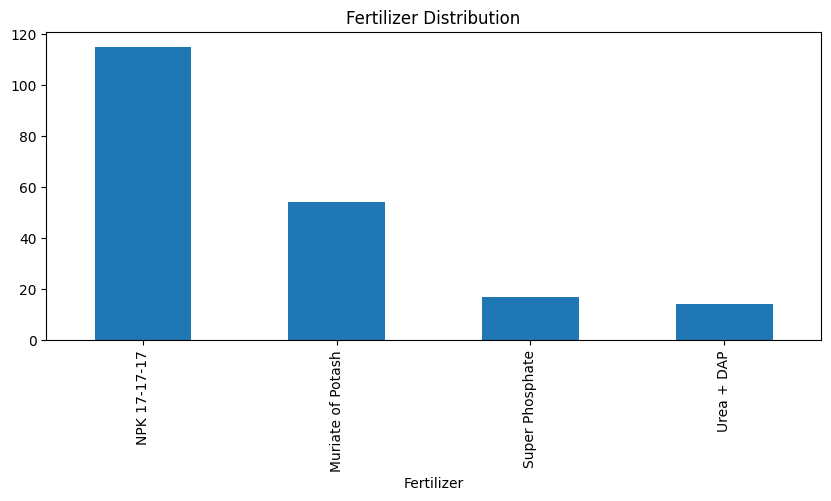

<Figure size 1200x500 with 0 Axes>

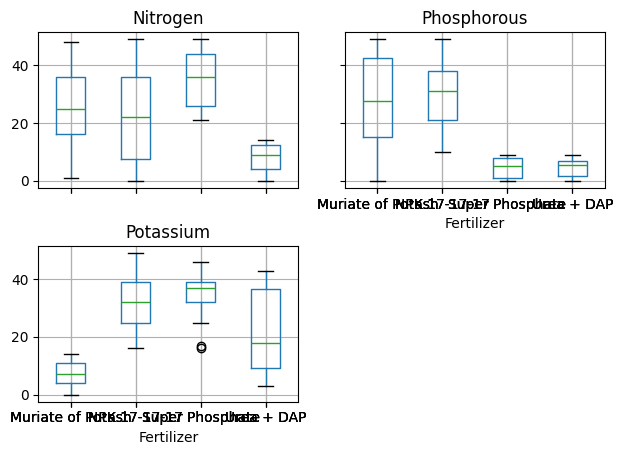

In [ ]:
# EDA
import matplotlib.pyplot as plt

# 1. Fertilizer distribution
plt.figure(figsize=(10,4))
df['Fertilizer'].value_counts().plot(kind='bar')
plt.title('Fertilizer Distribution')

# 2. Nutrient vs Fertilizer (boxplot)
plt.figure(figsize=(12,5))
df.boxplot(column=['Nitrogen', 'Phosphorous', 'Potassium'], by='Fertilizer')
plt.suptitle('')
plt.tight_layout()

In [ ]:
# Synthetic Data Generation
import pandas as pd
import numpy as np

np.random.seed(42)
data_size = 200

# Generate features
data = {
    'Temperature': np.random.randint(10, 40, data_size),
    'Humidity': np.random.randint(20, 90, data_size),
    'Soil_Type': np.random.choice(['Loamy', 'Sandy', 'Clay', 'Black', 'Red'], data_size),
    'Crop_Type': np.random.choice(['Wheat', 'Rice', 'Corn', 'Soybean', 'Cotton'], data_size),
    'Nitrogen': np.random.randint(0, 50, data_size),
    'Potassium': np.random.randint(0, 50, data_size),
    'Phosphorous': np.random.randint(0, 50, data_size)
}

# Simple rule-based target
fertilizer_rules = []
for i in range(data_size):
    n, p, k = data['Nitrogen'][i], data['Phosphorous'][i], data['Potassium'][i]
    if n < 20 and p < 10: fertilizer_rules.append('Urea + DAP')
    elif k < 15: fertilizer_rules.append('Muriate of Potash')
    elif p < 10: fertilizer_rules.append('Super Phosphate')
    else: fertilizer_rules.append('NPK 17-17-17')

data['Fertilizer'] = fertilizer_rules

df = pd.DataFrame(data)
df.to_csv('fertilizer_data.csv', index=False)
df.head()

,Temperature,Humidity,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,16,34,Clay,Cotton,47,14,48,Muriate of Potash
1,29,62,Loamy,Rice,10,23,6,Urea + DAP
2,38,48,Sandy,Wheat,46,37,16,NPK 17-17-17
3,24,55,Red,Rice,22,34,19,NPK 17-17-17
4,20,32,Sandy,Corn,15,29,40,NPK 17-17-17
